In [1]:
import netCDF4
from numpy import *
import matplotlib.pyplot as plt
import xarray as xr
import PyNIO as Nio
import pandas as pd
import glob
from scipy.stats import *

from scipy.stats.stats import pearsonr
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import BoundaryNorm

from area_mean import *
from binned_cyFunctions5 import *
from read_hs_file import read_var_mod
from get_LWPCMIP6data import *
#from get_annual_so import *
from useful_func_cy import *

from loop_small_LRM import *

In [2]:
rng = random.default_rng(seed=42)
a = rng.random(9)

b  =  rng.random(9)

r, p = pearsonr(a, a-rng.random(9)* 6)

print(a, b)
print(r, p)

[0.77395605 0.43887844 0.85859792 0.69736803 0.09417735 0.97562235
 0.7611397  0.78606431 0.12811363] [0.45038594 0.37079802 0.92676499 0.64386512 0.82276161 0.4434142
 0.22723872 0.55458479 0.06381726]
0.22044425495286937 0.5687055995339753


In [3]:
loop_LRM_simple('CESM2', 'forecasting')

CESM2
2
['/glade/collections/cmip/CMIP6/CMIP/NCAR/CESM2/abrupt-4xCO2/r1i1p1f1/Amon/ps/gn/files/', '/glade/collections/cmip/CMIP6/CMIP/NCAR/CESM2/abrupt-4xCO2/r1i1p1f1/Amon/ps/gn/latest/', '/glade/collections/cmip/CMIP6/CMIP/NCAR/CESM2/abrupt-4xCO2/r1i1p1f1/Amon/ps/gn/v20190828/', '/glade/collections/cmip/CMIP6/CMIP/NCAR/CESM2/abrupt-4xCO2/r1i1p1f1/Amon/ps/gn/v20190425/', '/glade/collections/cmip/CMIP6/CMIP/NCAR/CESM2/abrupt-4xCO2/r1i1p1f1/Amon/ps/gn/v20190927/']
/glade/collections/cmip/CMIP6/CMIP/NCAR/CESM2/abrupt-4xCO2/r1i1p1f1/Amon/ps/gn/v20190927/ps_Amon_CESM2_abrupt-4xCO2_r1i1p1f1_gn_075001-079912.nc


/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test5/read_hs_file.py:137: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  data = f.variables[varnm][ind]


/glade/collections/cmip/CMIP6/CMIP/NCAR/CESM2/abrupt-4xCO2/r1i1p1f1/Amon/ps/gn/v20190927/ps_Amon_CESM2_abrupt-4xCO2_r1i1p1f1_gn_085001-089912.nc
/glade/collections/cmip/CMIP6/CMIP/NCAR/CESM2/abrupt-4xCO2/r1i1p1f1/Amon/ps/gn/v20190927/ps_Amon_CESM2_abrupt-4xCO2_r1i1p1f1_gn_035001-039912.nc
/glade/collections/cmip/CMIP6/CMIP/NCAR/CESM2/abrupt-4xCO2/r1i1p1f1/Amon/ps/gn/v20190927/ps_Amon_CESM2_abrupt-4xCO2_r1i1p1f1_gn_040001-044912.nc
/glade/collections/cmip/CMIP6/CMIP/NCAR/CESM2/abrupt-4xCO2/r1i1p1f1/Amon/ps/gn/v20190927/ps_Amon_CESM2_abrupt-4xCO2_r1i1p1f1_gn_000101-015012.nc
/glade/collections/cmip/CMIP6/CMIP/NCAR/CESM2/abrupt-4xCO2/r1i1p1f1/Amon/ps/gn/v20190927/ps_Amon_CESM2_abrupt-4xCO2_r1i1p1f1_gn_030001-034912.nc
/glade/collections/cmip/CMIP6/CMIP/NCAR/CESM2/abrupt-4xCO2/r1i1p1f1/Amon/ps/gn/v20190927/ps_Amon_CESM2_abrupt-4xCO2_r1i1p1f1_gn_090001-094912.nc
/glade/collections/cmip/CMIP6/CMIP/NCAR/CESM2/abrupt-4xCO2/r1i1p1f1/Amon/ps/gn/v20190927/ps_Amon_CESM2_abrupt-4xCO2_r1i1p1f1_gn_06

In [2]:
modn  = 'CESM2'
type_analysis  = 'forecasting'
# store the model info:
exp = 'piControl'


SAM0={'modn': 'SAM0-UNICON', 'consort': 'SNU', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE21G = {'modn': 'GISS-E2-1-G', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2 = {'modn': 'CESM2', 'consort': 'NCAR', 'cmip': 'cmip6',
         'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

if (exp=='piControl')|(exp=='amip'):
    #GISSE21G = {'modn': 'GISS-E2-1-G', 'consort': 'NASA-GISS', 'cmip': 'cmip6',   # Jan27, for now, all take the lower part definition
    #        'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
    #CESM2 = {'modn': 'CESM2', 'consort': 'NCAR', 'cmip': 'cmip6',
    #     'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
    HADGEM3 = {'modn': 'HadGEM3-GC31-LL', 'consort': 'MOHC', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
    MIROC6 = {'modn': 'MIROC6', 'consort': 'MIROC', 'cmip': 'cmip6',
          'exper': exp, 'ensmem': 'r2i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
    CAMSCSM1 = {'modn': 'CAMS-CSM1-0', 'consort': 'CAMS', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

CESM2FV2 = {'modn': 'CESM2-FV2', 'consort': 'NCAR', 'cmip': 'cmip6',
         'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

GISSE21H = {'modn': 'GISS-E2-1-H', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

CESM2WACCM = {'modn': 'CESM2-WACCM', 'consort': 'NCAR', 'cmip': 'cmip6',
         'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
HADGEM3 = {'modn': 'HadGEM3-GC31-LL', 'consort': 'MOHC', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f3', 'gg': 'gn', "typevar": 'Amon'}   #  Be careful, failure due to 'day time representation'
UKESM10 = {'modn': 'UKESM1-0-LL', 'consort': 'MOHC', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gn', "typevar": 'Amon'}   # the same day time representation issue as 'HadGem3'
IPSLCM6ALR = {'modn': 'IPSL-CM6A-LR', 'consort': 'IPSL', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}
CNRMCM6 = {'modn': 'CNRM-CM6-1', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}# time doesn't corresponding for 'evspsbl' in  'pi-Control' exper

CNRMESM2 = {'modn': 'CNRM-ESM2-1', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6', 
           'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
MIROC6 = {'modn': 'MIROC6', 'consort': 'MIROC', 'cmip': 'cmip6',
          'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
MIROCES2L= {'modn': 'MIROC-ES2L', 'consort': 'MIROC', 'cmip': 'cmip6',
          'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gn', "typevar": 'Amon'}#


GFDLCM4 = {'modn': 'GFDL-CM4', 'consort': 'NOAA-GFDL', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}
# repaired Dec.30th
BCCESM1 = {'modn': 'BCC-ESM1', 'consort': 'BCC', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
ACCESSCM2 = {'modn': 'ACCESS-CM2', 'consort': 'CSIRO-ARCCSS', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}#..'/glade/' don't have 'Amon' typevar
CAMSCSM1 = {'modn': 'CAMS-CSM1-0', 'consort': 'CAMS', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r2i1p1f1', 'gg': 'gn', "typevar": 'Amon'}#  abrupt4x exper doesnt have 'ps' variable in r1i1p1f1
MPIESM12LR = {'modn': 'MPI-ESM1-2-LR', 'consort': 'MPI-M', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}#..'/glade/' dont have 'Amon' typevar
CanESM5 = {'modn': 'CanESM5', 'consort': 'CCCma', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
INM_CM48 = {'modn': 'INM-CM4-8', 'consort': 'INM', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}#..'/glade/' dont have 'Amon' typevar
INM_CM50 = {'modn': 'INM-CM5-0', 'consort': 'INM', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}#..'/glade/' dont have 'Amon' typevar

NORESM2LM = {'modn': 'NorESM2-LM', 'consort': 'NCC', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}# missing a lot of variables and typevars
E3SM10 = {'modn': 'E3SM-1-0', 'consort': 'E3SM-Project', 'cmip': 'cmip6',
          'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}
# repaired Dec 30th
AWICM11MR = {'modn': 'AWI-CM-1-1-MR', 'consort': 'AWI', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}#..'/glade/' dont have 'tas' variable
CMCC = {'modn': 'CMCC-CM2-SR5', 'consort': 'CMCC', 'cmip': 'cmip6',
        'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'} #..'/glade/' dont have 'abrupt-4xCO2'/'piControl' exper
ECE = {'modn': 'EC-Earth3', 'consort': 'EC-Earth-Consortium', 'cmip': 'cmip6',
       'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'} #..dont have 'Amon' or variable 'tas'
#ECE has different variants for exper
ECEV = {'modn': 'EC-Earth3-Veg', 'consort': 'EC-Earth-Consortium', 'cmip': 'cmip6',
       'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}#..too hard to operateee

#ECEV has very discrete year in 'abrupt-4xCO2', semms continued but each in one yr file in 'piControl'
MRIESM20 = {'modn': 'MRI-ESM2-0', 'consort': 'MRI', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
FGOALSg3 = {'modn': 'FGOALS-g3', 'consort': 'CAS', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}# '/glade/' dont have 'Amon' typever in 'abru4x'

deck_nas2 = ['BCCESM1', 'CanESM5', 'CESM2', 'CESM2FV2', 'CESM2WACCM', 'CNRMESM2', 'GISSE21G', 'GISSE21H', 'IPSLCM6ALR', 'MRIESM20', 'MIROC6', 'SAM0']
deck2  = [BCCESM1, CanESM5, CESM2, CESM2FV2, CESM2WACCM, CNRMESM2, GISSE21G, GISSE21H, IPSLCM6ALR, MRIESM20, MIROC6, SAM0]



# get cmip6 data:
name_j  = 0
while name_j < len(deck_nas2):

    if modn== deck_nas2[name_j]:
        if type_analysis == 'forecasting':
            inputVar_pi, inputVar_abr = get_LWPCMIP6(**deck2[name_j])
        else:                    # port for historical analysis
            print('not cmip6')   # port for historical analysis

    name_j +=1
print("Don't have this model right now !")



# begin process data:
#..get the shapes of monthly data
shape_lat = len(inputVar_pi['lat'])
shape_lon = len(inputVar_pi['lon'])
shape_time_pi = len(inputVar_pi['times'])
shape_time_abr = len(inputVar_abr['times'])
#print(shape_lat, shape_lon, shape_time_pi, shape_time_abr)


#..choose lat 40 -85 °S as the Southern-Ocean Regions
lons        = inputVar_pi['lon']
lats        = inputVar_pi['lat'][:]

levels      = array(inputVar_abr['pres'])
times_abr   = inputVar_abr['times']
times_pi    = inputVar_pi['times']


lati0 = -40.
latsi0= min(range(len(lats)), key = lambda i: abs(lats[i] - lati0))
lati1 = -85.
latsi1= min(range(len(lats)), key = lambda i: abs(lats[i] - lati1))
print('lat index for 40.s; 85.s', latsi0, latsi1)


shape_latSO =  latsi0 - latsi1 +1
#print(shape_latSO)


#..abrupt4xCO2 Variables: LWP, tas(gmt), SST, p-e, LTS, subsidence
LWP_abr  = array(inputVar_abr['clwvi']) - array(inputVar_abr['clivi'])   #..units in kg m^-2

gmt_abr  = array(inputVar_abr['tas'])

SST_abr  = array(inputVar_abr['sfc_T'])

Precip_abr =  array(inputVar_abr['P']) * (24.*60.*60.)   #..Precipitation. Convert the units from kg m^-2 s^-1 -> mm*day^-1
Eva_abr    =  array(inputVar_abr['E']) * (24.*60.*60.)   #..evaporation, mm day^-1

MC_abr  = Precip_abr - Eva_abr   #..Moisture Convergence calculated from abrupt4xCO2's P - E, Units in mm day^-1

Twp_abr  = array(inputVar_abr['clwvi'])
Iwp_abr  = array(inputVar_abr['clivi'])
prw_abr  = array(inputVar_abr['prw'])

print('Abr simple global-mean-gmt(K): ', nanmean(gmt_abr))

#..pi-Control Variables: LWP, tas(gmt), SST, p-e, LTS, subsidence
LWP  = array(inputVar_pi['clwvi']) - array(inputVar_pi['clivi'])   #..units in kg m^-2

gmt  = array(inputVar_pi['tas'])

SST  = array(inputVar_pi['sfc_T'])

Precip =  array(inputVar_pi['P'])* (24.*60.*60.)    #..Precipitation. Convert the units from kg m^-2 s^-1 -> mm*day^-1
Eva    =  array(inputVar_pi['E']) * (24.*60.*60.)   #..evaporation, mm day^-1

MC  = Precip - Eva   #..Moisture Convergence calculated from pi-Control's P - E, Units in mm day^-1

Twp  = array(inputVar_pi['clwvi'])
Iwp  = array(inputVar_pi['clivi'])
prw_pi =  array(inputVar_pi['prw'])

print('pi-C simple global mean-gmt(K): ', nanmean(gmt))


#..abrupt4xCO2
# Lower Tropospheric Stability:
k  = 0.286
theta_700_abr  = array(inputVar_abr['T_700']) * (100000./70000.)** k
theta_skin_abr = array(inputVar_abr['sfc_T']) * (100000./ array(inputVar_abr['sfc_P'])) **k
LTS_m_abr  = theta_700_abr - theta_skin_abr

#..Subtract the outliers in T_700 and LTS_m, 'nan' comes from missing T_700 data
LTS_e_abr  = ma.masked_where(theta_700_abr >= 500, LTS_m_abr)


# Meteorology Subsidence at 500 hPa, units in Pa s^-1:
Subsidence_abr =  array(inputVar_abr['sub'])


#..pi-Control 
# Lower Tropospheric Stability:
theta_700  = array(inputVar_pi['T_700']) * (100000./70000.)** k
theta_skin = array(inputVar_pi['sfc_T']) * (100000./ array(inputVar_pi['sfc_P'])) **k
LTS_m  = theta_700 - theta_skin

#..Subtract the outliers in T_700 and LTS_m 
LTS_e  = ma.masked_where(theta_700 >= 500, LTS_m)


#..Meteological Subsidence  at 500 hPa, units in Pa s^-1:
Subsidence =  array(inputVar_pi['sub'])


# define Dictionary to store: CCFs(4), gmt, other variables 
dict0_PI_var = {'gmt': gmt, 'LWP': LWP, 'TWP': Twp, 'IWP': Iwp,  'PRW': prw_pi, 'SST': SST, 'p_e': MC, 'LTS': LTS_e, 'SUB': Subsidence
                 ,'lat':lats, 'lon':lons, 'times': times_pi, 'pres':levels}

dict0_abr_var = {'gmt': gmt_abr, 'LWP': LWP_abr, 'TWP': Twp_abr, 'IWP': Iwp_abr,  'PRW': prw_abr, 'SST': SST_abr, 'p_e': MC_abr, 'LTS': LTS_e_abr 
                 ,'SUB': Subsidence_abr, 'lat':lats, 'lon':lons, 'times': times_abr, 'pres':levels}



# get the Annual-mean, Southern-Ocean region arrays

datavar_nas = ['LWP', 'TWP', 'IWP', 'PRW', 'SST', 'p_e', 'LTS', 'SUB']   #..8 varisables except gmt (lon dimension diff)

dict1_PI_yr  = {}
dict1_abr_yr = {}

shape_yr_pi  = shape_time_pi//12
shape_yr_abr =  shape_time_abr//12


layover_yr_abr =  zeros((len(datavar_nas), shape_yr_abr, shape_latSO, shape_lon))
layover_yr_pi  =  zeros((len(datavar_nas), shape_yr_pi, shape_latSO, shape_lon))

layover_yr_abr_gmt =  zeros((shape_yr_abr, shape_lat, shape_lon))
layover_yr_pi_gmt =  zeros((shape_yr_pi, shape_lat, shape_lon))


for a in range(len(datavar_nas)):

    for i in range(shape_time_abr//12):
        layover_yr_abr[a, i,:,:] =  nanmean(dict0_abr_var[datavar_nas[a]][i*12:(i+1)*12, latsi1:latsi0+1,:], axis=0)

    dict1_abr_yr[datavar_nas[a]+'_yr'] =  layover_yr_abr[a,:]

    for j in range(shape_time_pi//12):
        layover_yr_pi[a, j,:,:]  = nanmean(dict0_PI_var[datavar_nas[a]][j*12:(j+1)*12,  latsi1:latsi0+1,:], axis=0)

    dict1_PI_yr[datavar_nas[a]+'_yr'] =  layover_yr_pi[a,:]

    print(datavar_nas[a], " finish calculating annually-mean array")    



for i in range(shape_time_abr//12):

    layover_yr_abr_gmt[i,:,:]  =  nanmean(dict0_abr_var['gmt'][i*12:(i+1)*12, :,:], axis=0)
dict1_abr_yr['gmt_yr']  =   layover_yr_abr_gmt


for j in range(shape_time_pi//12):
    layover_yr_pi_gmt[j,:,:]  =   nanmean(dict0_PI_var['gmt'][j*12:(j+1)*12, :,:], axis=0)
dict1_PI_yr['gmt_yr']  =   layover_yr_pi_gmt

print('gmt', " finsih calc annuallt mean gmt")



# Calculate 5*5 bin array for variables (LWP, CCFs) in Sounthern Ocean Region:

#..set are-mean range and define function
x_range  = arange(-180., 183, 5.)   #..logitude sequences edge: number:73
s_range  = arange(-90., 90, 5.) + 2.5   #..global-region latitude edge:(36)
y_range  = arange(-85, -35., 5.) +2.5   #..southern-ocaen latitude edge:10


# Annually variables in bin box: 
lat_array  = lats[latsi1:latsi0+1]
lon_array  = lons
lat_array1 =  lats
#..big storage dict
dict1_PI_var   = {}
dict1_abr_var  =  {}
dict1_yr_bin_PI  = {}
dict1_yr_bin_abr = {}


for b in range(len(datavar_nas)):

    dict1_yr_bin_abr[datavar_nas[b]+'_yr_bin']  =   binned_cySouthOcean5(dict1_abr_yr[datavar_nas[b]+'_yr'], lat_array, lon_array)
    dict1_yr_bin_PI[datavar_nas[b]+'_yr_bin']   =  binned_cySouthOcean5(dict1_PI_yr[datavar_nas[b]+'_yr'], lat_array, lon_array)
    print(datavar_nas[b], " finished calculating annually-mean bin array") 

dict1_yr_bin_abr['gmt_yr_bin']   =  binned_cyGlobal5(dict1_abr_yr['gmt_yr'], lat_array1, lon_array)
dict1_yr_bin_PI['gmt_yr_bin']   =  binned_cyGlobal5(dict1_PI_yr['gmt_yr'], lat_array1, lon_array)

print('gmt_yr_bin', " finish calc annually-mean binned gmt")

dict1_abr_var['dict1_yr_bin_abr']  =  dict1_yr_bin_abr
dict1_PI_var['dict1_yr_bin_PI']  = dict1_yr_bin_PI



# Monthly variables (same as above):
dict1_mon_bin_PI  = {}
dict1_mon_bin_abr = {}

for c in range(len(datavar_nas)):

    dict1_mon_bin_abr[datavar_nas[c]+'_mon_bin']  =   binned_cySouthOcean5(dict0_abr_var[datavar_nas[c]][:, latsi1:latsi0+1,:], lat_array, lon_array)
    dict1_mon_bin_PI[datavar_nas[c]+'_mon_bin']   =  binned_cySouthOcean5(dict0_PI_var[datavar_nas[c]][:, latsi1:latsi0+1,:], lat_array, lon_array)
    print(datavar_nas[c], " finish calculating monthly-mean bin array")

dict1_mon_bin_abr['gmt_mon_bin']   =  binned_cyGlobal5(dict0_abr_var['gmt'], lat_array1, lon_array)
dict1_mon_bin_PI['gmt_mon_bin']   =  binned_cyGlobal5(dict0_PI_var['gmt'], lat_array1, lon_array)

print('gmt_mon_bin', " finish calc monthly-mean binned gmt")

dict1_abr_var['dict1_mon_bin_abr']  = dict1_mon_bin_abr
dict1_PI_var['dict1_mon_bin_PI']  = dict1_mon_bin_PI


# input the shapes of year and month of pi&abr exper into the raw data dictionaries:
dict1_abr_var['shape_yr'] = shape_yr_abr
dict1_PI_var['shape_yr'] = shape_yr_pi
dict1_abr_var['shape_mon'] = shape_time_abr
dict1_PI_var['shape_mon'] = shape_time_pi



# Output a dict for processing function in 'calc_LRM_metrics', stored the data dicts for PI and abr, with the model name_dict
# C_dict =  {'dict0_PI_var':dict1_PI_var, 'dict0_abr_var':dict1_abr_var, 'model_data':model_data}    #..revised in Dec.30th, at 2021,, note the name.


# Second step processing data

# load annually-mean bin data
dict1_yr_bin_PI  = dict1_PI_var['dict1_yr_bin_PI']
dict1_yr_bin_abr  = dict1_abr_var['dict1_yr_bin_abr']


# load monthly bin data
dict1_mon_bin_PI  = dict1_PI_var['dict1_mon_bin_PI']
dict1_mon_bin_abr  = dict1_abr_var['dict1_mon_bin_abr']

# data array in which shapes?
shape_yr_PI_3 = dict1_yr_bin_PI['LWP_yr_bin'].shape
shape_yr_abr_3 = dict1_yr_bin_abr['LWP_yr_bin'].shape

shape_yr_PI_gmt = dict1_yr_bin_PI['gmt_yr_bin'].shape
shape_yr_abr_gmt = dict1_yr_bin_abr['gmt_yr_bin'].shape

shape_mon_PI_3 = dict1_mon_bin_PI['LWP_mon_bin'].shape
shape_mon_abr_3 = dict1_mon_bin_abr['LWP_mon_bin'].shape

shape_mon_PI_gmt = dict1_mon_bin_PI['gmt_mon_bin'].shape
shape_mon_abr_gmt = dict1_mon_bin_abr['gmt_mon_bin'].shape

# flatten the data array for 'training' lrm  coefficience

dict2_predi_fla_PI = {}
dict2_predi_fla_abr = {}

#..Ravel binned array /Standardized data ARRAY :
for d in range(len(datavar_nas)):

    dict2_predi_fla_PI[datavar_nas[d]] = dict1_mon_bin_PI[datavar_nas[d]+'_mon_bin'].flatten()
    dict2_predi_fla_abr[datavar_nas[d]] = dict1_mon_bin_abr[datavar_nas[d]+'_mon_bin'].flatten()


#..Use area_mean method, 'np.repeat' and 'np.tile' to reproduce gmt area-mean Array as the same shape as other flattened variables:
GMT_pi  =   area_mean(dict1_mon_bin_PI['gmt_mon_bin'], s_range, x_range)   #..ALL in shape : shape_yr_abr(single dimension)
dict2_predi_fla_PI['gmt']  = GMT_pi.repeat(730)
GMT_abr   =  area_mean(dict1_mon_bin_abr['gmt_mon_bin'], s_range, x_range)   #..ALL in shape : shape_yr_abr(single dimension)
dict2_predi_fla_abr['gmt'] = GMT_abr.repeat(730)

#  shape of flattened array:
shape_fla_PI   =   dict2_predi_fla_PI['LWP'].shape
shape_fla_abr   =   dict2_predi_fla_abr['LWP'].shape


# For pluging in different sets of cut-off(TR_sst & TR_sub) into LRM(s):

##  split cut-off: TR_sst and TR_sub for N1 and N2 slices in sort of self-defined (Mon)variable ranges

YY_ay_gcm  = dict1_mon_bin_PI['SST_mon_bin']
XX_ay_gcm  = dict1_mon_bin_PI['SUB_mon_bin']


y_gcm = linspace(nanpercentile(YY_ay_gcm, 5), nanpercentile(YY_ay_gcm, 99), 31)   #..supposed to be changed, 31
x_gcm = linspace(nanpercentile(XX_ay_gcm, 5), nanpercentile(XX_ay_gcm, 95), 22)   #.., 22

print("slice SUB bound:  ", x_gcm)
print("slice SST bound:  ", y_gcm)


# define cut-off

TR_sst =  full(len(y_gcm)-1, NaN)
TR_sub =  full(len(x_gcm) -1, NaN)
    
for c in arange(len(y_gcm)-1):
    TR_sst[c]  = (y_gcm[c] + y_gcm[c+1]) /2.
print("TR_sst : ", TR_sst)

for f in arange(len(x_gcm) -1):
    TR_sub[f]  = (x_gcm[f] + x_gcm[f+1]) /2.
print("TR_sub : ",TR_sub )
    
#..storage N1*N2 shape output result:
s1  = zeros((len(TR_sst), len(TR_sub)))
s2  = zeros((len(TR_sst), len(TR_sub)))
s3  = zeros((len(TR_sst), len(TR_sub)))
s4  = zeros((len(TR_sst), len(TR_sub)))  #.. for store training data Pearson correlation coeffi

cut_off1  = zeros((len(TR_sst), len(TR_sub)))   #..2d, len(y_gcm)-1 * len(x_gcm)-1
cut_off2  = zeros((len(TR_sst), len(TR_sub)))

coefa = []
coefb =[]
coefc = []
coefd =[]

CESM2
2
['/glade/collections/cmip/CMIP6/CMIP/NCAR/CESM2/abrupt-4xCO2/r1i1p1f1/Amon/ps/gn/files/', '/glade/collections/cmip/CMIP6/CMIP/NCAR/CESM2/abrupt-4xCO2/r1i1p1f1/Amon/ps/gn/latest/', '/glade/collections/cmip/CMIP6/CMIP/NCAR/CESM2/abrupt-4xCO2/r1i1p1f1/Amon/ps/gn/v20190828/', '/glade/collections/cmip/CMIP6/CMIP/NCAR/CESM2/abrupt-4xCO2/r1i1p1f1/Amon/ps/gn/v20190425/', '/glade/collections/cmip/CMIP6/CMIP/NCAR/CESM2/abrupt-4xCO2/r1i1p1f1/Amon/ps/gn/v20190927/']
/glade/collections/cmip/CMIP6/CMIP/NCAR/CESM2/abrupt-4xCO2/r1i1p1f1/Amon/ps/gn/v20190927/ps_Amon_CESM2_abrupt-4xCO2_r1i1p1f1_gn_075001-079912.nc


/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test5/read_hs_file.py:137: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  data = f.variables[varnm][ind]


/glade/collections/cmip/CMIP6/CMIP/NCAR/CESM2/abrupt-4xCO2/r1i1p1f1/Amon/ps/gn/v20190927/ps_Amon_CESM2_abrupt-4xCO2_r1i1p1f1_gn_085001-089912.nc
/glade/collections/cmip/CMIP6/CMIP/NCAR/CESM2/abrupt-4xCO2/r1i1p1f1/Amon/ps/gn/v20190927/ps_Amon_CESM2_abrupt-4xCO2_r1i1p1f1_gn_035001-039912.nc
/glade/collections/cmip/CMIP6/CMIP/NCAR/CESM2/abrupt-4xCO2/r1i1p1f1/Amon/ps/gn/v20190927/ps_Amon_CESM2_abrupt-4xCO2_r1i1p1f1_gn_040001-044912.nc
/glade/collections/cmip/CMIP6/CMIP/NCAR/CESM2/abrupt-4xCO2/r1i1p1f1/Amon/ps/gn/v20190927/ps_Amon_CESM2_abrupt-4xCO2_r1i1p1f1_gn_000101-015012.nc
/glade/collections/cmip/CMIP6/CMIP/NCAR/CESM2/abrupt-4xCO2/r1i1p1f1/Amon/ps/gn/v20190927/ps_Amon_CESM2_abrupt-4xCO2_r1i1p1f1_gn_030001-034912.nc
/glade/collections/cmip/CMIP6/CMIP/NCAR/CESM2/abrupt-4xCO2/r1i1p1f1/Amon/ps/gn/v20190927/ps_Amon_CESM2_abrupt-4xCO2_r1i1p1f1_gn_090001-094912.nc
/glade/collections/cmip/CMIP6/CMIP/NCAR/CESM2/abrupt-4xCO2/r1i1p1f1/Amon/ps/gn/v20190927/ps_Amon_CESM2_abrupt-4xCO2_r1i1p1f1_gn_06

In [42]:
# plug the cut-off into LRM tring function:
for i in range(len(y_gcm)-27):
    for j in range(len(x_gcm)-15):
        s1[i,j], s2[i,j], s3[i,j], s4[i,j], cut_off1[i,j], cut_off2[i,j], coef_a, coef_b, coef_c, coef_d  =  train_LRM_4(TR_sst[i], TR_sub[j], dict2_predi_fla_PI, dict2_predi_fla_abr,  shape_fla_PI, shape_fla_abr)

        print('number:', i+j, ' :  ', coef_b )
        coefa.append(coef_a)
        coefb.append(coef_b)
        coefc.append(coef_c)
        coefd.append(coef_d)

4LRM: HERE TR_sst =  218.35560937936572 K
4LRM: HERE TR_sub =  -0.03746389855270363 Pa s-1
shape7:  (3,)
shape8:  (49375,)
shape9:  (5787,)
shape10:  (736126,)
aeffi(up, cold):  [-0.00565403 -0.00470766  0.00186565 -0.00044323] aint:  1.2090312560012226
beffi(up, warm):  [ 0.00162801  0.01367225 -0.0010375   0.17736337] bint:  -0.35456032209277005
ceffi(down, cold):  [2.21274087e-05 2.03817467e-03 9.85407495e-06 2.62651025e-04] cint:  -0.004922644139854292
deffi(down, warm):  [ 0.00245984  0.01163691 -0.00033155  0.11441111] dint:  -0.5700282280828077
bias (867240,)
absolute bias: 19862.03100205274
examine regres-mean LWP for training shape1: 0.08272842329038839 0.0827284232903881
examine regres-mean LWP for training shape10: 0.09242801628455724 0.09242801628455691
shape7_abr:  (0,)
shape8_abr:  (157153,)
shape9_abr:  (343,)
shape10_abr:  (2254113,)
predct_data'shape:  (2628730,) Absolute bias:  0.02938454404142115 regressed data shape:  (2628730,)
 RMSE_shape1 for Predicted LWP:  0.03

In [55]:
def train_LRM_4(cut_off1, cut_off2, training_data, predict_data, shape_fla_training, shape_fla_predict):
    
    print('4LRM: HERE TR_sst = ', cut_off1, 'K')
    print('4LRM: HERE TR_sub = ', cut_off2, 'Pa s-1')
    
    # print('shape1: ', training_data['LWP'].shape)   # shape1
    
    # Process Training data
    #.. Subtract 'nan' in data, shape1 -> shape2(without 'nan' number) points and shape5('nan' number)
    ind1 = isnan(training_data['LTS']) == False 
    ind_true =  nonzero(ind1 ==True)
    #..Sign the the indexing into YB, or YB value will have a big changes
    ind_false =  nonzero(ind1 ==False)
    
    # print('shape2: ', array(ind_true).shape)        # shape2
    
    
    # Split data points with skin Temperature < / >=TR_sst & Subsidence@500mb <= / > TR_sub (upward motion / downward motion): 

    # shape1 split into shape3(smaller.TR_sst & up)\shape4(larger.equal.TR_sst & up)\shape5(smaller.TR_sst & down)\shape6(larger.equal.TR_sst & down)
    ind_sstlt_up =  nonzero( (training_data['SST'] <  cut_off1) & (training_data['SUB'] <=  cut_off2))
    ind_sstle_up =  nonzero( (training_data['SST'] >=  cut_off1) & (training_data['SUB'] <=  cut_off2))
    ind_sstlt_dw  = nonzero((training_data['SST'] <  cut_off1) &  (training_data['SUB'] >   cut_off2 ))
    ind_sstle_dw  = nonzero((training_data['SST'] >=  cut_off1) & (training_data['SUB'] >   cut_off2 ))

    
    # shape7:the intersection of places where has LTS value and skin_T < TR_sst & SUB500 <= TR_sub
    ind7  = intersect1d(ind_true, ind_sstlt_up)
    print('shape7: ', ind7.shape)   #.. points, shape7

    # shape8:the intersection of places where LTS value and skin_T >= TR_sst & SUB500 <= TR_sub
    ind8 = intersect1d(ind_true, ind_sstle_up)
    print('shape8: ', ind8.shape)   #.. points, shape8

    # shape9:the intersection of places where has LTS value and skin_T < TR_sst & SUB500 > TR_sub
    ind9  = intersect1d(ind_true, ind_sstlt_dw)
    print('shape9: ', ind9.shape)   #.. points, shape9

    # shape10:the intersection of places where LTS value and skin_T >= TR_sst & SUB500 > TR_sub 
    ind10 =  intersect1d(ind_true, ind_sstle_dw)
    print('shape10: ', ind10.shape)

    
    
    #..designate LWP single-array's value, training_data
    YB =  full((shape_fla_training), 0.0)
    YB[ind_false] =  training_data['LWP'][ind_false]   #..LWP single-column array with no LTS points as original values, with has LTS value points as 0.0.

    #..designate IWP single-array's value, training_data
    YB_iwp =  full((shape_fla_training), 0.0)
    YB_iwp[ind_false] =  training_data['IWP'][ind_false]
    
    
    #.. Multiple linear regreesion of Liquid Water Path to CCFs :
    
    #..Remove abnormal and missing_values, train model with different TR_sst and TR_sub regimes data
    XX_7  = array( [training_data['SST'][ind7], training_data['p_e'][ind7], training_data['LTS'][ind7], training_data['SUB'][ind7]] )
    XX_8  = array( [training_data['SST'][ind8], training_data['p_e'][ind8], training_data['LTS'][ind8], training_data['SUB'][ind8]] )
    XX_9  = array( [training_data['SST'][ind9], training_data['p_e'][ind9], training_data['LTS'][ind9], training_data['SUB'][ind9]] )
    XX_10 = array( [training_data['SST'][ind10], training_data['p_e'][ind10], training_data['LTS'][ind10], training_data['SUB'][ind10]] )


    if (len(ind7)!=0) & (len(ind8)!=0) & (len(ind9)!=0) & (len(ind10)!=0):
        regr7=linear_model.LinearRegression()
        result7 = regr7.fit(XX_7.T, training_data['LWP'][ind7])   #..regression for LWP WITH LTS and skin-T < TR_sst & 'up'
        aeffi  = result7.coef_
        aint   = result7.intercept_

        regr7_iwp = linear_model.LinearRegression()
        result7_IWP =regr7_iwp.fit(XX_7.T, training_data['IWP'][ind7])
        aeffi_iwp =  result7_IWP.coef_
        aint_iwp  =  result7_IWP.intercept_

        regr8=linear_model.LinearRegression()
        result8 = regr8.fit(XX_8.T, training_data['LWP'][ind8])   #..regression for LWP WITH LTS and skin-T >= TR_sst &'up'
        beffi  = result8.coef_
        bint   = result8.intercept_

        regr8_iwp = linear_model.LinearRegression()
        result8_IWP =regr8_iwp.fit(XX_8.T, training_data['IWP'][ind8])
        beffi_iwp =  result8_IWP.coef_
        bint_iwp  =  result8_IWP.intercept_

        regr9=linear_model.LinearRegression()
        result9 = regr9.fit(XX_9.T, training_data['LWP'][ind9])   #..regression for LWP WITH LTS and skin-T < TR_sst & 'down'
        ceffi  = result9.coef_
        cint   = result9.intercept_

        regr9_iwp = linear_model.LinearRegression()
        result9_IWP =regr9_iwp.fit(XX_9.T, training_data['IWP'][ind9])
        ceffi_iwp =  result9_IWP.coef_
        cint_iwp  =  result9_IWP.intercept_

        regr10=linear_model.LinearRegression()
        result10 = regr10.fit(XX_10.T, training_data['LWP'][ind10])   #..regression for LWP WITH LTS and skin-T >= TR_sst & 'down'
        deffi  = result10.coef_
        dint   = result10.intercept_

        regr10_iwp = linear_model.LinearRegression()
        result10_IWP =regr10_iwp.fit(XX_10.T, training_data['IWP'][ind10])
        deffi_iwp =  result10_IWP.coef_
        dint_iwp  =  result10_IWP.intercept_

    
    elif (len(ind7)==0) & (len(ind9)==0):
        aeffi  = full(4, 0.0)
        aint   = 0.0
        aeffi_iwp =  full(4, 0.0)
        aint_iwp = 0.0

        regr8=linear_model.LinearRegression()
        result8 = regr8.fit(XX_8.T, training_data['LWP'][ind8])   #..regression for LWP WITH LTS and skin-T >= TR_sst &'up'
        beffi  = result8.coef_
        bint   = result8.intercept_
        regr8_iwp = linear_model.LinearRegression()
        result8_IWP =regr8_iwp.fit(XX_8.T, training_data['IWP'][ind8])
        beffi_iwp =  result8_IWP.coef_
        bint_iwp  =  result8_IWP.intercept_

        ceffi  = full(4, 0.0)
        cint   = 0.0
        ceffi_iwp =  full(4, 0.0)
        cint_iwp = 0.0

        regr10=linear_model.LinearRegression()
        result10 = regr10.fit(XX_10.T, training_data['LWP'][ind10])   #..regression for LWP WITH LTS and skin-T >= TR_sst& 'down'
        deffi  = result10.coef_
        dint   = result10.intercept_
        regr10_iwp = linear_model.LinearRegression()
        result10_IWP =regr10_iwp.fit(XX_10.T, training_data['IWP'][ind10])
        deffi_iwp =  result10_IWP.coef_
        dint_iwp  =  result10_IWP.intercept_

    else:
        aeffi = 0
        beffi = 0
        ceffi = 0
        deffi = 0
        aint = aeffi
        bint = beffi
        cint = ceffi
        dint = deffi
        
        print('you input a non-wise value for cut-off(TR_sst, TR_sub at 500 mb')
        print('please try another cut-offs input...')

    
    
    #..save the coefficients:
    coef_a = array([aeffi, aint])
    coef_b = array([beffi, bint])
    coef_c = array([ceffi, cint])
    coef_d = array([deffi, dint])
    
    print('aeffi(up, cold): ', aeffi,  'aint: ', aint)
    print('beffi(up, warm): ', beffi,  'bint: ', bint)
    print('ceffi(down, cold): ', ceffi,  'cint: ', cint)
    print('deffi(down, warm): ', deffi,  'dint: ', dint)

    
    ## Regression for training DATA:
    
    sstle_uplwp_predi =  dot(beffi.reshape(1, -1), XX_8)  + bint   #..larger or equal than Tr_SST & SUB at 500 <= TR_sub
    sstlt_uplwp_predi =  dot(aeffi.reshape(1, -1), XX_7)  + aint   #..less than Tr_SST & SUB at 500 <= TR_sub
    sstlt_dwlwp_predi =  dot(ceffi.reshape(1, -1), XX_9)  + cint   #..less than Tr_SST & SUB at 500 > TR_sub
    sstle_dwlwp_predi =  dot(deffi.reshape(1, -1), XX_10)  + dint   #..larger or equal than Tr_SST & SUB at 500 > TR_sub

    # sstle_upiwp_predi  = dot(beffi_iwp.reshape(1,-1), XX_8) + bint_iwp
    # sstlt_upiwp_predi  = dot(aeffi_iwp.reshape(1,-1), XX_7) + aint_iwp 
    # sstlt_dwiwp_predi  = dot(ceffi_iwp.reshape(1,-1), XX_9) + cint_iwp
    # sstle_dwiwp_predi  = dot(deffi_iwp.reshape(1,-1), XX_10) + dint_iwp
    
    # emsembling into 'YB' predicted data array for Pi:
    YB[ind7] =  sstlt_uplwp_predi
    YB[ind8] =  sstle_uplwp_predi
    YB[ind9] =  sstlt_dwlwp_predi
    YB[ind10] =  sstle_dwlwp_predi
    
    # YB_iwp[ind7]  = sstlt_upiwp_predi
    # YB_iwp[ind8] =  sstle_upiwp_predi
    # YB_iwp[ind9]  = sstlt_dwiwp_predi
    # YB_iwp[ind10]  =  sstle_dwiwp_predi
    
    
    # Test performance for training data:
    bias  = training_data['LWP'] -YB
    print("bias" , bias.shape)
    abs_BIAS = sum( np.abs(training_data['LWP'] - YB)) / len(YB)
    print("absolute bias:", abs_BIAS)
    
    MSE_shape1 =  mean_squared_error(training_data['LWP'].reshape(-1,1), YB.reshape(-1,1))
    # print("RMSE_shape1 for training data lwp: ", sqrt(MSE_shape1))
    
    R_2_shape1  = r2_score(training_data['LWP'].reshape(-1, 1), YB.reshape(-1,1))
    # print("R_2_shape1 for trainging data lwp: ", R_2_shape1)
    
    ##print(training_data['LWP'].reshape(-1,1), YB.reshape(-1,1))
    r_shape1, p_shape1 = pearsonr(array(training_data['LWP']), array(YB))
    # print("Pearson correlation coefficient: ", r_shape1,  "p_value = ", p_shape1)
    
    
    
    # Examine the effectiveness of regression model:
    print('examine regres-mean LWP for training shape1:', nanmean(training_data['LWP']), nanmean(YB))
    print('examine regres-mean LWP for training shape10:', nanmean(training_data['LWP'][ind10]), nanmean(sstle_dwlwp_predi))

    #..print('examine regres-mean IWP for pi-C shape1:', mean(dict2_predi_fla_PI['IWP']) , mean(YB_iwp))


    
    
    # Process predict data
    
    #..Subtract 'nan' in data, shape1_abr -> shape2_abr points
    ind1_abr =  isnan(predict_data['LTS'])==False
    # print('shape1_abr :', ind1_abr.shape)
    
    ind_true_abr =  nonzero(ind1_abr ==True)   #..Sign the the indexing of 'non-NaN' in LTS_yr_bin
    # print('shape2_abr :', array(ind_true_abr).shape,  dict2_predi_fla_abr['LTS'][ind_true_abr].shape)
    ind_false_abr = nonzero(ind1_abr==False)



    #..Split the abrupt4x data points with TR_sst and TR_sub
    ind_sstlt_up_abr =  nonzero( (predict_data['SST'] < cut_off1) &  (predict_data['SUB'] <=  cut_off2))
    ind_sstle_up_abr =  nonzero( (predict_data['SST'] >= cut_off1) &  (predict_data['SUB'] <=  cut_off2))
    ind_sstlt_dw_abr  = nonzero( (predict_data['SST']< cut_off1) & (predict_data['SUB'] >   cut_off2))
    ind_sstle_dw_abr  = nonzero( (predict_data['SST'] >= cut_off1) & (predict_data['SUB'] >   cut_off2))

    ind7_abr  = intersect1d(ind_true_abr, ind_sstlt_up_abr)
    print('shape7_abr: ', ind7_abr.shape)   #..shape7_abr

    ind8_abr  = intersect1d(ind_true_abr, ind_sstle_up_abr)
    print('shape8_abr: ', ind8_abr.shape)   #..shape8_abr

    ind9_abr  = intersect1d(ind_true_abr, ind_sstlt_dw_abr)
    print('shape9_abr: ', ind9_abr.shape)   #..shape9_abr

    ind10_abr  = intersect1d(ind_true_abr, ind_sstle_dw_abr)
    print('shape10_abr: ', ind10_abr.shape)   #..shape10_abr
    
    
    #..designate LWP single-array's value, abr
    YB_abr   =  full((shape_fla_predict),  0.0)
    YB_abr[ind_false_abr] = predict_data['LWP'][ind_false_abr]   #..LWP single-column array with no LTS points as original values, with has LTS value points as 0.0. 
    
    YB_abr_iwp   =  full((shape_fla_predict),  0.0)   
    YB_abr_iwp[ind_false_abr] = predict_data['IWP'][ind_false_abr]   #..IWP 


    
    # Regression for abr LWP VALUES: 
    XX_7_abr  =  array([predict_data['SST'][ind7_abr], predict_data['p_e'][ind7_abr], predict_data['LTS'][ind7_abr], predict_data['SUB'][ind7_abr]])
    XX_8_abr  =  array([predict_data['SST'][ind8_abr], predict_data['p_e'][ind8_abr], predict_data['LTS'][ind8_abr], predict_data['SUB'][ind8_abr]])
    XX_9_abr  =  array([predict_data['SST'][ind9_abr], predict_data['p_e'][ind9_abr], predict_data['LTS'][ind9_abr], predict_data['SUB'][ind9_abr]])
    XX_10_abr =  array([predict_data['SST'][ind10_abr], predict_data['p_e'][ind10_abr], predict_data['LTS'][ind10_abr], predict_data['SUB'][ind10_abr]])

    # Regressed 1-D array
    sstlt_uplwp_predi_abr = dot(aeffi.reshape(1, -1),  XX_7_abr)  +  aint
    sstle_uplwp_predi_abr = dot(beffi.reshape(1, -1),  XX_8_abr)  +  bint
    sstlt_dwlwp_predi_abr = dot(ceffi.reshape(1, -1),  XX_9_abr)  +  cint
    sstle_dwlwp_predi_abr = dot(deffi.reshape(1, -1), XX_10_abr)  +  dint


    # sstlt_upiwp_predi_abr =  dot(aeffi_iwp.reshape(1,-1) , XX_7_abr) + aint_iwp   #.. SST smaller than TR_sst & 'up'
    # sstle_upiwp_predi_abr =  dot(beffi_iwp.reshape(1,-1) , XX_8_abr) + bint_iwp   #..SST larger or equal to TR_sst & 'up'
    # sstlt_dwiwp_predi_abr =  dot(ceffi_iwp.reshape(1,-1) , XX_9_abr) + cint_iwp   #.. SST smaller than TR_sst & 'down'
    # sstle_dwiwp_predi_abr =  dot(deffi_iwp.reshape(1,-1) , XX_10_abr) + dint_iwp   #..SST larger or equal to TR_sst & 'down'


    #  emsembling into 'YB_abr' predicted data array for 'abrupt4xCO2'
    YB_abr[ind7_abr]  =   sstlt_uplwp_predi_abr
    YB_abr[ind8_abr]  =   sstle_uplwp_predi_abr
    YB_abr[ind9_abr]  =   sstlt_dwlwp_predi_abr
    YB_abr[ind10_abr]  =   sstle_dwlwp_predi_abr

    # YB_abr_iwp[ind7_abr]  =  sstlt_upiwp_predi_abr
    # YB_abr_iwp[ind8_abr]  =  sstle_upiwp_predi_abr
    # YB_abr_iwp[ind9_abr]  =  sstlt_dwiwp_predi_abr
    # YB_abr_iwp[ind10_abr]  =  sstle_dwiwp_predi_abr
    
    # Test performance for abr(predict) data:
    abs_BIAS_abr = sum(np.abs(predict_data['LWP'] - YB_abr) )/len(YB_abr)
    print("predct_data'shape: ", predict_data['LWP'].shape, "Absolute bias: ", abs_BIAS_abr, "regressed data shape: ", YB_abr.shape)
    MSE_shape1_abr = mean_squared_error(YB_abr.reshape(-1,1),  predict_data['LWP'].reshape(-1, 1))
    
    R_2_shape1_abr = r2_score( YB_abr.reshape(-1,1),  predict_data['LWP'].reshape(-1,1))
    
    r_shape1_abr, p_shape1_abr =  pearsonr(YB_abr,  predict_data['LWP'])
    
    # MSE_shape1_abr_IWP  = mean_squared_error(YB_abr_iwp.reshape(-1,1), predict_data['LWP'].reshape(-1,1)['IWP'].reshape(-1, 1))   #..IWP
    # R_2_shape1_abr_IWP = r2_score(YB_abr_iwp.reshape(-1, 1 ),  predict_data['IWP'].reshape(-1,1))     #..IWP
     
    print(" RMSE_shape1 for Predicted LWP: ", sqrt(MSE_shape1_abr))   # note:sqrt(MSE_shape1_abr)
    print(" R_2_shape1 for Predicted LWP: ", R_2_shape1_abr)
    print(" Pearsonr correlation coefficient = ", r_shape1_abr, "p_value = ", p_shape1_abr)
    
    
    return sqrt(MSE_shape1_abr), R_2_shape1_abr, r_shape1_abr, r_shape1, cut_off1, cut_off2, coef_a, coef_b, coef_c, coef_d

['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test5/CESM2__STAT_pi+abr_22x_31y.npz']


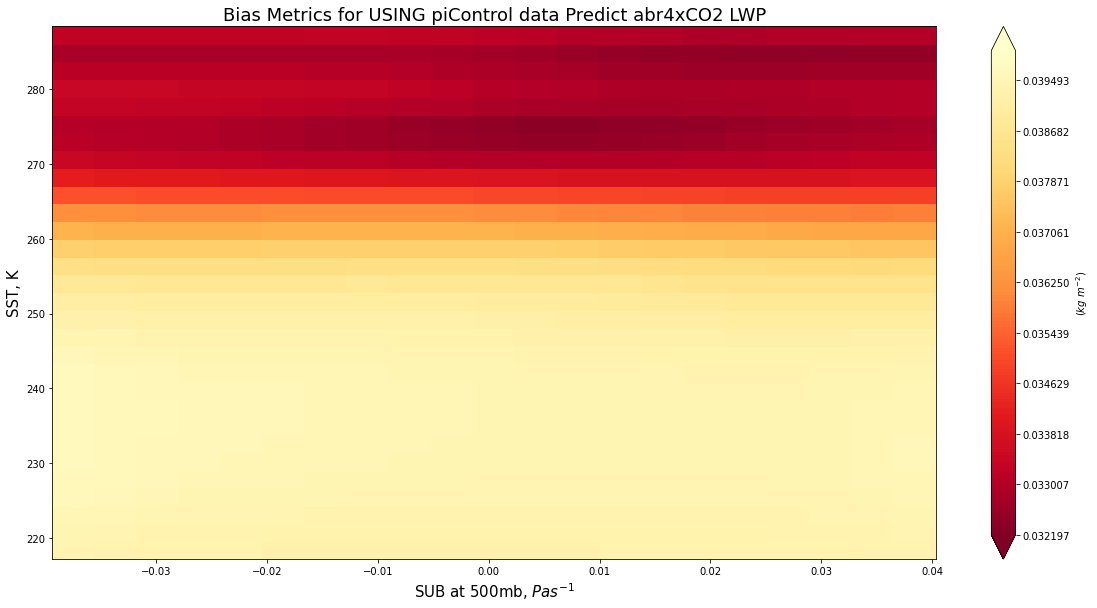

In [90]:
WD = '/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test5/'
# WD+ modn+'__'+ 'STAT_pi+abr_'+'22x_31y'
modn = 'CESM2'
folder =  glob.glob(WD+ modn+'__'+ 'STAT_pi+abr_'+'22x_31y'+'.npz')

print(folder)
output_ARRAY =  load(folder[0], allow_pickle=True)  # str(TR_sst)
output_stat  = output_ARRAY['stats_1']

fig3  = plt.figure(figsize = (19.8, 9.8))  #(16.2, 9.3))
ax3  = plt.axes()

#..defined a proper LWP ticks within its range
#..levels_value  = arange(0.025, 0.052, 0.0005)
p10_valuespace = nanpercentile(output_stat, 25.) - nanpercentile(output_stat, 15.)
levels_value  = linspace(nanpercentile(output_stat, 1.5)-p10_valuespace, nanpercentile(output_stat, 99.5)+p10_valuespace, 164)# arange(0.368, 0.534, 0.002)
#..levels_value  = arange(0.68, 0.90, 0.01)

#..print(linspace(nanpercentile(output_stat, 1.5), nanpercentile(output_stat, 99.5), 164))
#..pick the desired colormap
cmap = plt.get_cmap('YlOrRd_r')   # 'YlOrRd'

norm1 = BoundaryNorm(levels_value, ncolors= cmap.N, extend='both')


im1  = ax3.pcolormesh(x_gcm, y_gcm, array(output_stat), cmap=cmap, norm= norm1)   #..anmean_LWP_bin_Tskew_wvp..LWP_bin_Tskin_sub

# ax3.set_title("exp 'abrupt-4xCO2' GCM: BCCESM1 predict R_2", loc='left', fontsize = 11)

fig3.colorbar(im1, ax = ax3, label= r"$(kg\ m^{-2})$")
#..fig3.colorbar(im1, ax = ax3[, label= r"$ Coefficient of Determination$")

plt.xlabel('SUB at 500mb, '+ r'$Pa s^{-1}$', fontsize= 15)
plt.ylabel('SST, ' + 'K', fontsize= 15)
plt.title("Bias Metrics for USING piControl data Predict abr4xCO2 LWP", fontsize =18)

# plt.legend(loc='upper right',  fontsize= 12)

plt.savefig("model_bias_CESM2")

In [3]:
deck_nas2 = ['CNRMESM2', 'SAM0']   #..'BCCESM1', 'CanESM5', 'CESM2', 'CESM2FV2', 'CESM2WACCM', 'CNRMESM2', 'GISSE21G', 'GISSE21H', 'IPSLCM6ALR', 'MIROC6', 'MRIESM20', 'SAM0'  

for i in arange(len(deck_nas2)):
    
    loop_LRM_simple(deck_nas2[i], 'forecasting')
    
    

CNRM-ESM2-1
3
['/glade/collections/cmip/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1/abrupt-4xCO2/r1i1p1f2/Amon/ps/gr/v20181026/ps/']
/glade/collections/cmip/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1/abrupt-4xCO2/r1i1p1f2/Amon/ps/gr/v20181026/ps/ps_Amon_CNRM-ESM2-1_abrupt-4xCO2_r1i1p1f2_gr_185001-199912.nc
(1800, 128, 256)
retrieve time:  [1850, 1, 1] [2149, 12, 31]
CNRM-ESM2-1
3
['/glade/collections/cmip/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1/abrupt-4xCO2/r1i1p1f2/Amon/ts/gr/v20181026/ts/']
/glade/collections/cmip/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1/abrupt-4xCO2/r1i1p1f2/Amon/ts/gr/v20181026/ts/ts_Amon_CNRM-ESM2-1_abrupt-4xCO2_r1i1p1f2_gr_185001-199912.nc
(1800, 128, 256)
CNRM-ESM2-1
3
['/glade/collections/cmip/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1/abrupt-4xCO2/r1i1p1f2/Amon/ta/gr/v20181026/ta/']
/glade/collections/cmip/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1/abrupt-4xCO2/r1i1p1f2/Amon/ta/gr/v20181026/ta/ta_Amon_CNRM-ESM2-1_abrupt-4xCO2_r1i1p1f2_gr_185001-199912.nc
(1800, 19, 128, 256)
CNRM-ESM2-1
3
['/glade